In [ ]:
import jax
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt
from jax.nn import one_hot

In [3]:
# Load MNIST
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
n,x,y=x_train.shape

In [7]:
x,y

(28, 28)

In [8]:
jnp.unique(y_train)

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

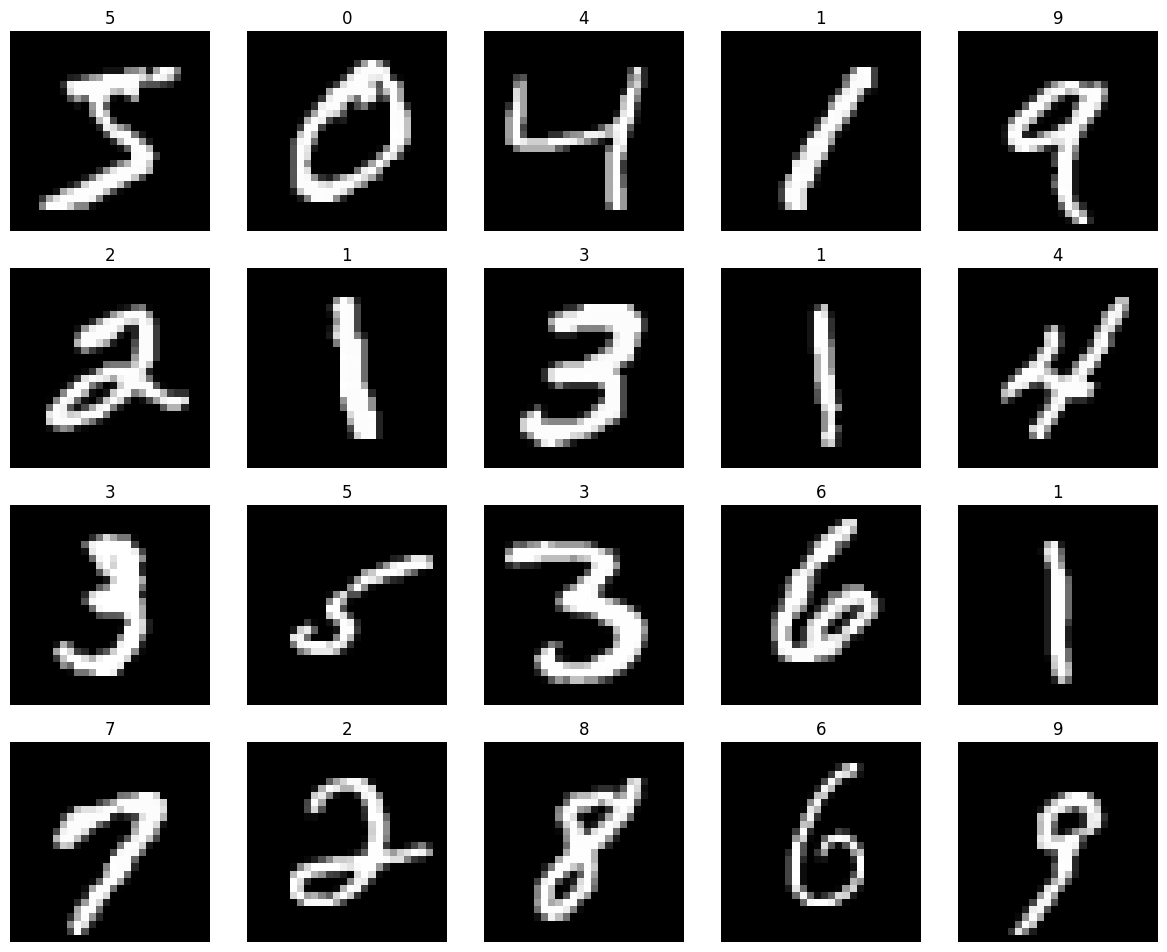

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

# Plot a subset of images with labels
plt.figure(figsize=(12, 12))
plot_index = 1
num_images = 20  # Number of images to plot

for i in range(num_images):
    plt.subplot(5, 5, plot_index)  # Adjust grid to fit images
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"{y_train[i]}")
    plt.axis("off")
    plot_index += 1

plt.tight_layout()
plt.show()


In [23]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='sigmoid', input_shape=(x,y,1)),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(filters=16, kernel_size=(5,5), activation='sigmoid'),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='sigmoid'),
    layers.Dense(84, activation='sigmoid'),
    layers.Dense(10, activation='softmax')  # Use activation='softmax' for probabilities
])


d:\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
# Summary
model.summary()

# Show model config
print(model.get_config())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

{'name': 'sequential_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_layer_1'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 6, 'kernel_size': (5, 5), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'confi

In [18]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
'''summary_writer = tf.summary.create_file_writer(log_dir)
step = ...
train_loss = ...
train_acc = ...

with summary_writer.as_default():
    tf.summary.scalar('loss', train_loss, step=step)
    tf.summary.scalar('accuracy', train_acc, step=step)'''


"summary_writer = tf.summary.create_file_writer(log_dir)\nstep = ...\ntrain_loss = ...\ntrain_acc = ...\n\nwith summary_writer.as_default():\n    tf.summary.scalar('loss', train_loss, step=step)\n    tf.summary.scalar('accuracy', train_acc, step=step)"

In [19]:
history=model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=36,
    validation_split=0.1,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4767 - loss: 1.4987 - val_accuracy: 0.9308 - val_loss: 0.2259
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9282 - loss: 0.2385 - val_accuracy: 0.9607 - val_loss: 0.1357
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9539 - loss: 0.1499 - val_accuracy: 0.9687 - val_loss: 0.1116
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9655 - loss: 0.1132 - val_accuracy: 0.9768 - val_loss: 0.0775
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9734 - loss: 0.0869 - val_accuracy: 0.9813 - val_loss: 0.0640
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9787 - loss: 0.0701 - val_accuracy: 0.9800 - val_loss: 0.0654
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9819 - loss: 0.0584 - val_accuracy: 0.9825 - val_loss: 0.0545
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9839 - loss: 0.0539

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9783 - loss: 0.0713
Test accuracy: 0.9819


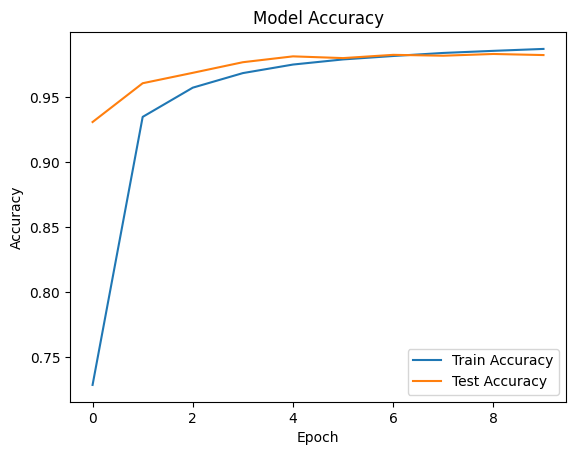

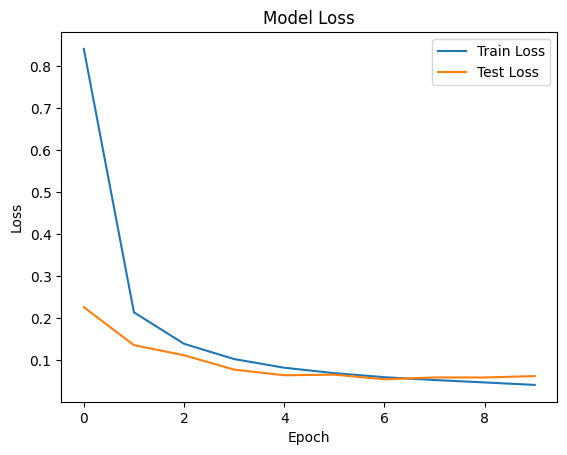

In [21]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Predicted label: 7


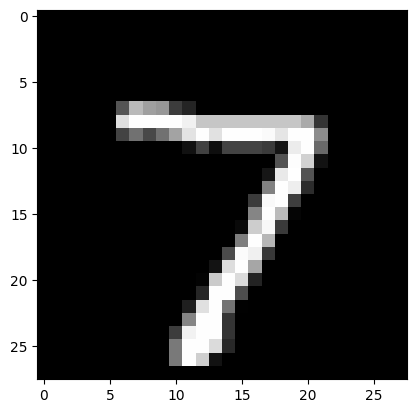

In [22]:
sample = x_test[0:1]        # Shape must be (1, 28, 28, 1)
pred = model.predict(sample)
predicted_label = jnp.argmax(pred)
print(f"Predicted label: {predicted_label}")
plt.imshow(sample.reshape(28, 28).astype('float32') / 255.0, cmap="gray")